# Introduction

This notebook is for 

# Imports/Settings

In [81]:
# Primary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Libraries for Modelling
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error

In [523]:
# GeoMap Visualization Libraries
import shapefile
from json import dumps

import geopandas as gpd
import geopandas as gpd2

In [25]:
# EDA Libraries
from pandas_profiling import ProfileReport

In [22]:
# Notebook Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_seq_items = 2000

# Data

In [9]:
df_colombia_input = pd.read_csv("_colombia_input.csv")
df_quindio_input = pd.read_csv("_quindio_input.csv")

In [23]:
df_colombia_input.head()

,raster_geocode_100,raster_pop_100,cities_100,cities_dist_100,clinics_100,clinics_dist_100,globcover_cls0,globcover_cls100,globcover_cls110,globcover_cls120,globcover_cls130,globcover_cls14,globcover_cls140,globcover_cls150,globcover_cls160,globcover_cls170,globcover_cls180,globcover_cls190,globcover_cls20,globcover_cls200,globcover_cls210,globcover_cls220,globcover_cls30,globcover_cls40,globcover_cls50,globcover_cls60,globcover_dst0,globcover_dst100,globcover_dst110,globcover_dst120,globcover_dst130,globcover_dst14,globcover_dst140,globcover_dst150,globcover_dst160,globcover_dst170,globcover_dst180,globcover_dst190,globcover_dst20,globcover_dst200,globcover_dst210,globcover_dst220,globcover_dst30,globcover_dst40,globcover_dst50,globcover_dst60,hamlets_100,hamlets_dist_100,hospitals_100,hospitals_dist_100,hydro_ele_100,hydro_slo_100,modis_100,night_lights_100,pharmacies_100,pharmacies_dist_100,protected_areas_100,protected_areas_dist_100,railways_100,railways_dist_100,rivers_100,rivers_dist_100,roads_100,roads_dist_100,schools_100,schools_dist_100,suburbs_100,suburbs_dist_100,towns_100,towns_dist_100,villages_100,villages_dist_100,water_100,water_dist_100,wc_prec_100,wc_temp_100
0,5001,64.843384,0.000027,8797.199059,0.001229,4843.599182,0,0,0.122060,0.007350,0.027154,0.001443,0.201518,0.0,0.0,0.0,0.000000,0.017506,0.082505,0.0,0.000000,0.000000,0.028597,0.488214,0.023653,0,773351.560830,1.189623e+06,1038.955447,3912.581890,3777.408194,9654.279078,1143.951919,27642.449380,68753.505025,277756.836514,13593.134755,5444.978512,1854.860006,42886.180057,19101.531537,42387.648412,1917.087075,336.097498,2751.114978,1.189890e+06,0.001229,1903.062487,0.004303,3296.516624,2041.682489,14.329384,8687.401326,17.522552,0.003555,3998.930511,0.442110,877.291934,0.0,96606.251283,0.120804,501.180270,0.385129,287.433585,0.015207,1807.920676,0.000428,4996.036188,0.000000,7506.019484,0.000134,4248.198685,0.002780,3367.206329,2465.610852,17.963045
1,5002,0.402134,0.000000,39920.387730,0.000000,20410.782467,0,0,0.001698,0.000849,0.022859,0.014765,0.005606,0.0,0.0,0.0,0.000000,0.000000,0.108628,0.0,0.000000,0.000711,0.127993,0.709252,0.007639,0,823538.948657,1.153261e+06,5651.901715,7248.329142,3289.295110,3275.803273,3520.524191,45233.871750,61970.945182,331294.491087,21427.635544,44387.064964,905.435579,30983.062398,33702.530508,16322.824947,884.231114,99.011666,3394.752305,1.149955e+06,0.000059,4890.824237,0.000099,7846.279852,1924.410273,17.947750,10919.719833,0.083530,0.000000,17199.662646,0.026629,7343.567639,0.0,49946.993328,0.023550,1975.707554,0.065852,911.807537,0.000217,6584.556446,0.000000,46762.701060,0.000020,7904.411102,0.000099,4784.248900,0.000138,10676.273535,2405.623776,17.614461
2,5004,0.090905,0.000000,70903.458603,0.000000,66473.717139,0,0,0.028509,0.006984,0.000000,0.003036,0.018219,0.0,0.0,0.0,0.000000,0.000000,0.030634,0.0,0.000000,0.000000,0.134345,0.773887,0.004386,0,732615.895580,1.205481e+06,2044.558063,2954.057996,9728.492105,4403.551687,3648.154690,28815.869399,51516.016363,219974.644838,19317.623448,65307.219534,1683.555837,30471.514372,9479.747841,13332.437686,847.301012,51.478779,3701.999629,1.211395e+06,0.000034,6557.351518,0.000034,6749.000709,2351.140317,20.360808,7770.138731,0.009682,0.000000,15938.878677,0.177665,1835.382591,0.0,147448.638327,0.030466,1821.952260,0.022099,2601.499764,0.000000,13018.233131,0.000000,65926.425776,0.000034,6838.485762,0.000034,8930.978475,0.000000,25638.253138,2385.232230,15.513250
3,5021,0.361598,0.000000,39232.747087,0.000000,38216.122495,0,0,0.011263,0.000000,0.021672,0.023070,0.000000,0.0,0.0,0.0,0.002796,0.000000,0.073404,0.0,0.072394,0.000000,0.006991,0.785614,0.002796,0,761452.842939,1.226127e+06,4585.116825,27230.180441,6418.127855,5097.200404,9475.866164,65822.290120,57370.788100,297570.035187,9767.149371,51909.984542,2883.482290,10932.315986,3669.104629,21105.159003,2605.916032,106.055616,4787.308529,1.222013e+06,0.000000,10147.852649,0.000078,6194.019419,1531.921547,10.7286

In [24]:
df_quindio_input.head()

,x,y,raster_pop_100,raster_geocode_100,cities_100,cities_dist_100,clinics_100,clinics_dist_100,globcover_cls0,globcover_cls100,globcover_cls110,globcover_cls120,globcover_cls130,globcover_cls14,globcover_cls140,globcover_cls150,globcover_cls160,globcover_cls170,globcover_cls180,globcover_cls190,globcover_cls20,globcover_cls200,globcover_cls210,globcover_cls220,globcover_cls30,globcover_cls40,globcover_cls50,globcover_cls60,globcover_dst0,globcover_dst100,globcover_dst110,globcover_dst120,globcover_dst130,globcover_dst14,globcover_dst140,globcover_dst150,globcover_dst160,globcover_dst170,globcover_dst180,globcover_dst190,globcover_dst20,globcover_dst200,globcover_dst210,globcover_dst220,globcover_dst30,globcover_dst40,globcover_dst50,globcover_dst60,hamlets_100,hamlets_dist_100,hospitals_100,hospitals_dist_100,hydro_ele_100,hydro_slo_100,modis_100,night_lights_100,pharmacies_100,pharmacies_dist_100,protected_areas_100,protected_areas_dist_100,railways_100,railways_dist_100,rivers_100,rivers_dist_100,roads_100,roads_dist_100,schools_100,schools_dist_100,suburbs_100,suburbs_dist_100,towns_100,towns_dist_100,villages_100,villages_dist_100,water_100,water_dist_100,wc_prec_100,wc_temp_100
0,400637,489066,3.748261,63401,0,27727,0,25681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,976000,994898,4198,3780,1487,1803,2561,45231,28015,273704,16401,25031,2002,21229,65604,28410,800,0,7072,989600,0,4442,0,12855,1022,5.299777,7768,0.000000,0,17463,0,19884,0,1603,1,0,0,1603,0,1772,0,51308,0,12272,0,3748,0,14006,1655.528944,22.889686
1,400637,489166,3.748261,63401,0,27683,0,25639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,975900,994985,4220,3860,1421,1838,2500,45325,28111,273770,16501,24982,2000,21328,65545,28402,781,0,7018,989692,0,4357,0,12832,1020,2.964354,7773,0.000000,0,17560,0,19807,0,1703,1,0,0,1703,0,1868,0,51306,0,12248,0,3821,0,14055,1651.934456,22.895122
2,400637,489266,3.748261,63401,0,27638,0,25598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,975800,995073,4245,3941,1360,1879,2441,45419,28208,273837,16601,24933,2000,21428,65486,28393,707,0,6964,989785,0,4272,0,12810,1019,1.993332,7846,0.000000,0,17657,0,19731,0,1803,1,0,0,1803,0,1965,0,51305,0,12225,0,3895,0,14022,1648.339967,22.900558
3,400737,488266,3.748261,63401,0,28006,0,25938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,976800,994247,4001,3111,2163,1649,2147,44444,27216,273245,15603,25348,2285,20435,66000,28392,949,0,7622,988900,0,5188,0,12215,1022,7.614138,7826,0.002592,0,16717,0,20444,0,825,1,0,0,825,0,985,0,51228,0,11715,0,3302,0,13552,1687.388203,22.806357
4,400737,488366,3.748261,63401,0,27959,0,25894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,976700,994334,4005,3183,2081,1746,2236,44538,27312,273312,15703,25296,2247,20535,65940,28381,922,0,7560,988992,0,5100,0,12292,1016,5.558328,7812,0.000000,0,16813,0,20366,0,922,1,0,0,922,0,1077,0,51225,0,11792,0,3360,0,13596,1684.244899,22.821819


## Data Preprocessing

### colombia_input

In [153]:
df_columbia = df_colombia_input[['raster_geocode_100','cities_100', 'cities_dist_100',
       'clinics_100', 'clinics_dist_100', 'globcover_cls0', 'globcover_cls100',
       'globcover_cls110', 'globcover_cls120', 'globcover_cls130',
       'globcover_cls14', 'globcover_cls140', 'globcover_cls150',
       'globcover_cls160', 'globcover_cls170', 'globcover_cls180',
       'globcover_cls190', 'globcover_cls20', 'globcover_cls200',
       'globcover_cls210', 'globcover_cls220', 'globcover_cls30',
       'globcover_cls40', 'globcover_cls50', 'globcover_cls60',
       'globcover_dst0', 'globcover_dst100', 'globcover_dst110',
       'globcover_dst120', 'globcover_dst130', 'globcover_dst14',
       'globcover_dst140', 'globcover_dst150', 'globcover_dst160',
       'globcover_dst170', 'globcover_dst180', 'globcover_dst190',
       'globcover_dst20', 'globcover_dst200', 'globcover_dst210',
       'globcover_dst220', 'globcover_dst30', 'globcover_dst40',
       'globcover_dst50', 'globcover_dst60', 'hamlets_100', 'hamlets_dist_100',
       'hospitals_100', 'hospitals_dist_100', 'hydro_ele_100', 'hydro_slo_100',
       'modis_100', 'night_lights_100', 'pharmacies_100',
       'pharmacies_dist_100', 'protected_areas_100',
       'protected_areas_dist_100', 'railways_100', 'railways_dist_100',
       'rivers_100', 'rivers_dist_100', 'roads_100', 'roads_dist_100',
       'schools_100', 'schools_dist_100', 'suburbs_100', 'suburbs_dist_100',
       'towns_100', 'towns_dist_100', 'villages_100', 'villages_dist_100',
       'water_100', 'water_dist_100', 'wc_prec_100', 'wc_temp_100']]

X_colombia = df_columbia.values
y_colombia = df_colombia_input.raster_pop_100.values

In [154]:
X_colombia_train, X_colombia_test, y_colombia_train, y_colombia_test =\
    train_test_split(X_colombia, y_colombia, test_size=0.2, random_state=123)

### quindio_input

In [155]:
df_quindio = df_quindio_input[['raster_geocode_100','cities_100', 'cities_dist_100',
       'clinics_100', 'clinics_dist_100', 'globcover_cls0', 'globcover_cls100',
       'globcover_cls110', 'globcover_cls120', 'globcover_cls130',
       'globcover_cls14', 'globcover_cls140', 'globcover_cls150',
       'globcover_cls160', 'globcover_cls170', 'globcover_cls180',
       'globcover_cls190', 'globcover_cls20', 'globcover_cls200',
       'globcover_cls210', 'globcover_cls220', 'globcover_cls30',
       'globcover_cls40', 'globcover_cls50', 'globcover_cls60',
       'globcover_dst0', 'globcover_dst100', 'globcover_dst110',
       'globcover_dst120', 'globcover_dst130', 'globcover_dst14',
       'globcover_dst140', 'globcover_dst150', 'globcover_dst160',
       'globcover_dst170', 'globcover_dst180', 'globcover_dst190',
       'globcover_dst20', 'globcover_dst200', 'globcover_dst210',
       'globcover_dst220', 'globcover_dst30', 'globcover_dst40',
       'globcover_dst50', 'globcover_dst60', 'hamlets_100', 'hamlets_dist_100',
       'hospitals_100', 'hospitals_dist_100', 'hydro_ele_100', 'hydro_slo_100',
       'modis_100', 'night_lights_100', 'pharmacies_100',
       'pharmacies_dist_100', 'protected_areas_100',
       'protected_areas_dist_100', 'railways_100', 'railways_dist_100',
       'rivers_100', 'rivers_dist_100', 'roads_100', 'roads_dist_100',
       'schools_100', 'schools_dist_100', 'suburbs_100', 'suburbs_dist_100',
       'towns_100', 'towns_dist_100', 'villages_100', 'villages_dist_100',
       'water_100', 'water_dist_100', 'wc_prec_100', 'wc_temp_100']]

X_quindio = df_quindio.values
y_quindio = df_quindio_input.raster_pop_100.values

# EDA

## Minimal Report

In the first pass, we want to quickly go over the features in the datasets.
Consequently we perform a minimal profile report.

In [26]:
PROFILE_colombia_input = ProfileReport(df_colombia_input, 
                                          title="Colombia Profile Report (minimal)", 
                                          plot={'histogram': {'bins': 50}}, 
                                          minimal=True)
PROFILE_colombia_input.to_file("_colombia_input_MIN.html")

In [28]:
PROFILE_quindio_input = ProfileReport(df_quindio_input, 
                                          title="Quindio Profile Report (minimal)", 
                                          plot={'histogram': {'bins': 50}}, 
                                          minimal=True)
PROFILE_quindio_input.to_file("_quindio_input_MIN.html")

# Exercise 1

Use the input data for Colombia on the municipality level (“colombia_input.fst”) to create a plot that visualizes the relationship between population density (“raster_pop_100”) and light intensity recorded at night (“night_lights_100”).

From the plot below, we can expect (and observe) a strong importance correlation with the `night_lights_100` feature.

<AxesSubplot:xlabel='raster_pop_100', ylabel='night_lights_100'>

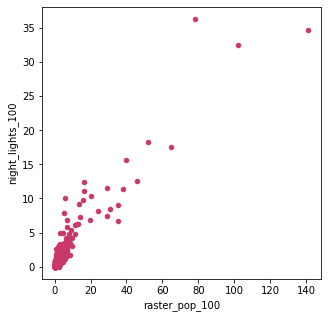

In [606]:
df_colombia_input.plot(kind='scatter', 
                       x='raster_pop_100', y="night_lights_100", 
                       color='#c93867', figsize=(5,5))


# Exercise 2

Use the input data for Colombia on the municipality level (“colombia_input.fst”) to train a suitable (machine learning) model to predict population density based on the other variables in the data set.

To get a better sense of the problem, we will use two models for predicting population density based on the suite of variables in the `colombia_input`: xgboost and lightgbm.

Note, we choose to use the gamma distribution during training both models as we want to constrain our population predictions to be greater than zero.

## XGB

In [272]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_colombia =\
    xgb.XGBRegressor(objective="reg:gamma", 
                     n_estimators=75, subsample=0.75, max_depth=7)
xgb_colombia.fit(X_colombia_train, y_colombia_train)    

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=75, n_jobs=6, num_parallel_tree=1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, subsample=0.75, tree_method='exact',
             validate_parameters=1, verbosity=None)

For XGB, we examine the MAE, RMSE metrics as well as the explained variance score for the training and test sets.

In [608]:
# Train
y_xgb_colombia_pred_train = xgb_colombia.predict(X_colombia_train)

# Basic MAE/RMSE, Explained Variance (Train)
print("Training Set"),\
print('The MAE of prediction is:', 
      round(metrics.mean_absolute_error(
          y_xgb_colombia_pred_train, y_colombia_train))),\
print('The RMSE of prediction is:', 
      round(metrics.mean_squared_error(
          y_xgb_colombia_pred_train, y_colombia_train))),\
print('Explained Variance Score:', 
      (explained_variance_score(
    y_xgb_colombia_pred_train, y_colombia_train)))

Training Set
The MAE of prediction is: 0
The RMSE of prediction is: 0
Explained Variance Score: 0.999989198447483


(None, None, None, None)

In [610]:
# Test
y_xgb_colombia_pred_test = xgb_colombia.predict(X_colombia_test) 

# Basic MAE/RMSE, Explained Variance (Test)
print("Test Set"),\
print('The MAE of prediction is:', 
      round(metrics.mean_absolute_error(
          y_xgb_colombia_pred_test, y_colombia_test))),\
print('The RMSE of prediction is:', 
      round(metrics.mean_squared_error(
          y_xgb_colombia_pred_test, y_colombia_test))),\
print('Explained Variance Score:', 
      (explained_variance_score(
    y_xgb_colombia_pred_test, y_colombia_test)))

Test Set
The MAE of prediction is: 1
The RMSE of prediction is: 4
Explained Variance Score: 0.8664142416445878


(None, None, None, None)

## LightGBM

In [310]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'gamma',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [311]:
lgb_colombia = lgb.LGBMRegressor(**hyper_params)

In [313]:
lgb_colombia.fit(X_colombia_train, y_colombia_train,
        eval_set=[(X_colombia_test, y_colombia_test)],
        eval_metric='gamma',
        early_stopping_rounds=1000)

/Users/reginaldbryant/opt/miniconda3/envs/gp_p38/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's gamma: 0.751069	valid_0's l1: 1.29051	valid_0's l2: 26.8424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's gamma: 0.74515	valid_0's l1: 1.28608	valid_0's l2: 26.8242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's gamma: 0.739434	valid_0's l1: 1.28186	valid_0's l2: 26.8063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's gamma: 0.734085	valid_0's l1: 1.27771	valid_0's l2: 26.7884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's gamma: 0.728673	valid_0's l1: 1.27358	valid_0's l2: 26.7705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's gamma: 0.723505	valid_0's l1: 1.26963	valid_0's l2: 26.7528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's gamma: 0.71

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[188]	valid_0's gamma: 0.368949	valid_0's l1: 1.0038	valid_0's l2: 24.2234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[189]	valid_0's gamma: 0.367629	valid_0's l1: 1.00262	valid_0's l2: 24.2016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[190]	valid_0's gamma: 0.366332	valid_0's l1: 1.00147	valid_0's l2: 24.1797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[191]	valid_0's gamma: 0.365111	valid_0's l1: 1.00033	valid_0's l2: 24.1588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[192]	valid_0's gamma: 0.363902	valid_0's l1: 0.999204	valid_0's l2: 24.1377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[193]	valid_0's gamma: 0.362809	valid_0's l1: 0.998252	valid_0's l2: 24.1188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[194]	valid_0's ga

[346]	valid_0's gamma: 0.25246	valid_0's l1: 0.8472	valid_0's l2: 20.0943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[347]	valid_0's gamma: 0.25216	valid_0's l1: 0.846508	valid_0's l2: 20.0674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[348]	valid_0's gamma: 0.25179	valid_0's l1: 0.845723	valid_0's l2: 20.0369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[349]	valid_0's gamma: 0.251457	valid_0's l1: 0.845004	valid_0's l2: 20.0099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	valid_0's gamma: 0.251113	valid_0's l1: 0.844373	valid_0's l2: 19.9828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[351]	valid_0's gamma: 0.250734	valid_0's l1: 0.8435	valid_0's l2: 19.9495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[352]	valid_0's gamma: 0.250316	valid_0's l1: 0.842628	valid_0's l2: 19.9161
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[513]	valid_0's gamma: 0.214434	valid_0's l1: 0.784208	valid_0's l2: 14.5659
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[514]	valid_0's gamma: 0.214297	valid_0's l1: 0.783474	valid_0's l2: 14.5236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[515]	valid_0's gamma: 0.214167	valid_0's l1: 0.782746	valid_0's l2: 14.4812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[516]	valid_0's gamma: 0.214055	valid_0's l1: 0.782047	valid_0's l2: 14.439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[517]	valid_0's gamma: 0.213942	valid_0's l1: 0.781347	valid_0's l2: 14.3968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[518]	valid_0's gamma: 0.213827	valid_0's l1: 0.780635	valid_0's l2: 14.3545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[519]	valid_0'

[713]	valid_0's gamma: 0.201395	valid_0's l1: 0.687572	valid_0's l2: 8.74711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[714]	valid_0's gamma: 0.201418	valid_0's l1: 0.68705	valid_0's l2: 8.72053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[715]	valid_0's gamma: 0.201424	valid_0's l1: 0.686597	valid_0's l2: 8.69428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[716]	valid_0's gamma: 0.201437	valid_0's l1: 0.686107	valid_0's l2: 8.6683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[717]	valid_0's gamma: 0.201351	valid_0's l1: 0.685604	valid_0's l2: 8.64254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[718]	valid_0's gamma: 0.201266	valid_0's l1: 0.685221	valid_0's l2: 8.61789
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[719]	valid_0's gamma: 0.201263	valid_0's l1: 0.684423	valid_0's l2: 8.5879
[LightGBM] [Wa

[777]	valid_0's gamma: 0.200121	valid_0's l1: 0.650379	valid_0's l2: 7.26856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[778]	valid_0's gamma: 0.200159	valid_0's l1: 0.649743	valid_0's l2: 7.2417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[779]	valid_0's gamma: 0.20012	valid_0's l1: 0.64903	valid_0's l2: 7.21385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[780]	valid_0's gamma: 0.200088	valid_0's l1: 0.648376	valid_0's l2: 7.18675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[781]	valid_0's gamma: 0.200085	valid_0's l1: 0.648141	valid_0's l2: 7.17049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[782]	valid_0's gamma: 0.200088	valid_0's l1: 0.647935	valid_0's l2: 7.1553
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[783]	valid_0's gamma: 0.200084	valid_0's l1: 0.647472	valid_0's l2: 7.13252
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[904]	valid_0's gamma: 0.19837	valid_0's l1: 0.59885	valid_0's l2: 5.3128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[905]	valid_0's gamma: 0.198349	valid_0's l1: 0.598753	valid_0's l2: 5.30581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[906]	valid_0's gamma: 0.1983	valid_0's l1: 0.598497	valid_0's l2: 5.29605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[907]	valid_0's gamma: 0.19828	valid_0's l1: 0.5984	valid_0's l2: 5.28919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[908]	valid_0's gamma: 0.19826	valid_0's l1: 0.598303	valid_0's l2: 5.28241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[909]	valid_0's gamma: 0.198233	valid_0's l1: 0.598182	valid_0's l2: 5.27607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[910]	valid_0's gamma:

[1083]	valid_0's gamma: 0.199088	valid_0's l1: 0.564413	valid_0's l2: 4.53306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1084]	valid_0's gamma: 0.199144	valid_0's l1: 0.564296	valid_0's l2: 4.52849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1085]	valid_0's gamma: 0.199198	valid_0's l1: 0.564173	valid_0's l2: 4.52414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1086]	valid_0's gamma: 0.199241	valid_0's l1: 0.564066	valid_0's l2: 4.51911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1087]	valid_0's gamma: 0.199282	valid_0's l1: 0.563959	valid_0's l2: 4.51487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1088]	valid_0's gamma: 0.199336	valid_0's l1: 0.563837	valid_0's l2: 4.51065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1089]	valid_0's gamma: 0.199379	valid_0's l1: 0.563726	valid_0's l2: 4.5065
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1260]	valid_0's gamma: 0.198619	valid_0's l1: 0.545736	valid_0's l2: 4.13207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1261]	valid_0's gamma: 0.198643	valid_0's l1: 0.545642	valid_0's l2: 4.13271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1262]	valid_0's gamma: 0.198677	valid_0's l1: 0.545731	valid_0's l2: 4.13708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1263]	valid_0's gamma: 0.198681	valid_0's l1: 0.545663	valid_0's l2: 4.13731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1264]	valid_0's gamma: 0.198688	valid_0's l1: 0.545597	valid_0's l2: 4.13755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1265]	valid_0's gamma: 0.198692	valid_0's l1: 0.54553	valid_0's l2: 4.1378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1266]	va

[1448]	valid_0's gamma: 0.196819	valid_0's l1: 0.525743	valid_0's l2: 3.80061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1449]	valid_0's gamma: 0.196831	valid_0's l1: 0.525709	valid_0's l2: 3.80067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1450]	valid_0's gamma: 0.196856	valid_0's l1: 0.525696	valid_0's l2: 3.80079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1451]	valid_0's gamma: 0.196848	valid_0's l1: 0.525579	valid_0's l2: 3.79771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1452]	valid_0's gamma: 0.196843	valid_0's l1: 0.525512	valid_0's l2: 3.79666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1453]	valid_0's gamma: 0.196833	valid_0's l1: 0.525428	valid_0's l2: 3.79549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1454]	valid_0's gamma: 0.196824	valid_0's l1: 0.525527	valid_0's l2: 3.79732
[Lig

[1633]	valid_0's gamma: 0.195147	valid_0's l1: 0.511844	valid_0's l2: 3.57494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1634]	valid_0's gamma: 0.195151	valid_0's l1: 0.511959	valid_0's l2: 3.57538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1635]	valid_0's gamma: 0.195135	valid_0's l1: 0.512025	valid_0's l2: 3.57466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1636]	valid_0's gamma: 0.195135	valid_0's l1: 0.512129	valid_0's l2: 3.57506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1637]	valid_0's gamma: 0.195125	valid_0's l1: 0.512242	valid_0's l2: 3.57554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1638]	valid_0's gamma: 0.195116	valid_0's l1: 0.51233	valid_0's l2: 3.57586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1639]	valid_0's gamma: 0.195101	valid_0's l1: 0.512391	valid_0's l2: 3.57652
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1803]	valid_0's gamma: 0.195617	valid_0's l1: 0.508646	valid_0's l2: 3.53282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1804]	valid_0's gamma: 0.195626	valid_0's l1: 0.508525	valid_0's l2: 3.53012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1805]	valid_0's gamma: 0.195632	valid_0's l1: 0.508395	valid_0's l2: 3.52738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1806]	valid_0's gamma: 0.195609	valid_0's l1: 0.508317	valid_0's l2: 3.52392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1807]	valid_0's gamma: 0.195623	valid_0's l1: 0.508199	valid_0's l2: 3.52132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1808]	valid_0's gamma: 0.195631	valid_0's l1: 0.508087	valid_0's l2: 3.51869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1809]	

[1974]	valid_0's gamma: 0.194554	valid_0's l1: 0.50317	valid_0's l2: 3.39979
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1975]	valid_0's gamma: 0.194529	valid_0's l1: 0.502998	valid_0's l2: 3.39821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1976]	valid_0's gamma: 0.194502	valid_0's l1: 0.502822	valid_0's l2: 3.39664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1977]	valid_0's gamma: 0.194484	valid_0's l1: 0.502678	valid_0's l2: 3.3951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1978]	valid_0's gamma: 0.19446	valid_0's l1: 0.502509	valid_0's l2: 3.39358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1979]	valid_0's gamma: 0.194444	valid_0's l1: 0.502325	valid_0's l2: 3.39202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1980]	valid_0's gamma: 0.194431	valid_0's l1: 0.502133	valid_0's l2: 3.39047
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2133]	valid_0's gamma: 0.194167	valid_0's l1: 0.497313	valid_0's l2: 3.30454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2134]	valid_0's gamma: 0.194196	valid_0's l1: 0.497423	valid_0's l2: 3.3066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2135]	valid_0's gamma: 0.194226	valid_0's l1: 0.497512	valid_0's l2: 3.3084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2136]	valid_0's gamma: 0.194253	valid_0's l1: 0.497593	valid_0's l2: 3.31001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2137]	valid_0's gamma: 0.194288	valid_0's l1: 0.497705	valid_0's l2: 3.31215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2138]	valid_0's gamma: 0.194313	valid_0's l1: 0.497793	valid_0's l2: 3.31387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2139]	va

[2306]	valid_0's gamma: 0.193579	valid_0's l1: 0.491405	valid_0's l2: 3.19581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2307]	valid_0's gamma: 0.193582	valid_0's l1: 0.491339	valid_0's l2: 3.19401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2308]	valid_0's gamma: 0.193587	valid_0's l1: 0.49124	valid_0's l2: 3.19223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2309]	valid_0's gamma: 0.193598	valid_0's l1: 0.491143	valid_0's l2: 3.18942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2310]	valid_0's gamma: 0.193608	valid_0's l1: 0.491092	valid_0's l2: 3.18874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2311]	valid_0's gamma: 0.193609	valid_0's l1: 0.490966	valid_0's l2: 3.18778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2312]	valid_0's gamma: 0.193607	valid_0's l1: 0.490812	valid_0's l2: 3.18608
[Ligh

[2481]	valid_0's gamma: 0.193077	valid_0's l1: 0.484672	valid_0's l2: 3.08536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2482]	valid_0's gamma: 0.193054	valid_0's l1: 0.484652	valid_0's l2: 3.08447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2483]	valid_0's gamma: 0.19304	valid_0's l1: 0.484872	valid_0's l2: 3.08699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2484]	valid_0's gamma: 0.193022	valid_0's l1: 0.485069	valid_0's l2: 3.08898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2485]	valid_0's gamma: 0.193026	valid_0's l1: 0.485295	valid_0's l2: 3.09137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2486]	valid_0's gamma: 0.193006	valid_0's l1: 0.485495	valid_0's l2: 3.09341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2487]	valid_0's gamma: 0.193002	valid_0's l1: 0.485697	valid_0's l2: 3.09591
[Ligh

[2638]	valid_0's gamma: 0.192683	valid_0's l1: 0.487411	valid_0's l2: 3.12593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2639]	valid_0's gamma: 0.19268	valid_0's l1: 0.487462	valid_0's l2: 3.12727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2640]	valid_0's gamma: 0.192673	valid_0's l1: 0.487454	valid_0's l2: 3.12812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2641]	valid_0's gamma: 0.192666	valid_0's l1: 0.487411	valid_0's l2: 3.1272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2642]	valid_0's gamma: 0.192661	valid_0's l1: 0.487434	valid_0's l2: 3.1275
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2643]	valid_0's gamma: 0.192669	valid_0's l1: 0.487383	valid_0's l2: 3.12652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2644]	valid_0's gamma: 0.192684	valid_0's l1: 0.487383	valid_0's l2: 3.1263
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2819]	valid_0's gamma: 0.191959	valid_0's l1: 0.482336	valid_0's l2: 3.05657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2820]	valid_0's gamma: 0.19196	valid_0's l1: 0.482455	valid_0's l2: 3.05831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2821]	valid_0's gamma: 0.191944	valid_0's l1: 0.482421	valid_0's l2: 3.05726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2822]	valid_0's gamma: 0.191934	valid_0's l1: 0.482378	valid_0's l2: 3.05642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2823]	valid_0's gamma: 0.191915	valid_0's l1: 0.482258	valid_0's l2: 3.05426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2824]	valid_0's gamma: 0.191905	valid_0's l1: 0.482207	valid_0's l2: 3.05339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2825]	v

[2984]	valid_0's gamma: 0.191242	valid_0's l1: 0.477803	valid_0's l2: 2.98045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2985]	valid_0's gamma: 0.191231	valid_0's l1: 0.477715	valid_0's l2: 2.97989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2986]	valid_0's gamma: 0.191254	valid_0's l1: 0.477541	valid_0's l2: 2.977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2987]	valid_0's gamma: 0.191238	valid_0's l1: 0.477423	valid_0's l2: 2.97545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2988]	valid_0's gamma: 0.191224	valid_0's l1: 0.477218	valid_0's l2: 2.97146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2989]	valid_0's gamma: 0.191227	valid_0's l1: 0.477216	valid_0's l2: 2.97129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2990]	valid_0's gamma: 0.191235	valid_0's l1: 0.477275	valid_0's l2: 2.97269
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3121]	valid_0's gamma: 0.190839	valid_0's l1: 0.473238	valid_0's l2: 2.90517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3122]	valid_0's gamma: 0.190833	valid_0's l1: 0.473293	valid_0's l2: 2.90561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3123]	valid_0's gamma: 0.190822	valid_0's l1: 0.473242	valid_0's l2: 2.90444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3124]	valid_0's gamma: 0.190813	valid_0's l1: 0.473204	valid_0's l2: 2.90317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3125]	valid_0's gamma: 0.190804	valid_0's l1: 0.47316	valid_0's l2: 2.90202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3126]	valid_0's gamma: 0.190794	valid_0's l1: 0.473113	valid_0's l2: 2.90088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3127]	v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3261]	valid_0's gamma: 0.191146	valid_0's l1: 0.469593	valid_0's l2: 2.84782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3262]	valid_0's gamma: 0.191151	valid_0's l1: 0.469642	valid_0's l2: 2.84851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3263]	valid_0's gamma: 0.191166	valid_0's l1: 0.469675	valid_0's l2: 2.84872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3264]	valid_0's gamma: 0.191171	valid_0's l1: 0.469726	valid_0's l2: 2.84944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3265]	valid_0's gamma: 0.191176	valid_0's l1: 0.469623	valid_0's l2: 2.84821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3266]	valid_0's gamma: 0.191189	valid_0's l1: 0.469675	valid_0's l2: 2.84903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3267]	

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3375]	valid_0's gamma: 0.190879	valid_0's l1: 0.47047	valid_0's l2: 2.85358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3376]	valid_0's gamma: 0.19086	valid_0's l1: 0.470414	valid_0's l2: 2.85285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3377]	valid_0's gamma: 0.190845	valid_0's l1: 0.470355	valid_0's l2: 2.85232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3378]	valid_0's gamma: 0.190824	valid_0's l1: 0.470319	valid_0's l2: 2.85216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3379]	valid_0's gamma: 0.190803	valid_0's l1: 0.470288	valid_0's l2: 2.85201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3380]	valid_0's gamma: 0.190808	valid_0's l1: 0.470229	valid_0's l2: 2.85151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3381]	va

[3471]	valid_0's gamma: 0.190765	valid_0's l1: 0.470664	valid_0's l2: 2.87645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3472]	valid_0's gamma: 0.190749	valid_0's l1: 0.470714	valid_0's l2: 2.87739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3473]	valid_0's gamma: 0.19073	valid_0's l1: 0.470822	valid_0's l2: 2.87879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3474]	valid_0's gamma: 0.190713	valid_0's l1: 0.470865	valid_0's l2: 2.87972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3475]	valid_0's gamma: 0.190697	valid_0's l1: 0.47092	valid_0's l2: 2.88091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3476]	valid_0's gamma: 0.19068	valid_0's l1: 0.471027	valid_0's l2: 2.88229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3477]	valid_0's gamma: 0.190662	valid_0's l1: 0.470926	valid_0's l2: 2.88076
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3654]	valid_0's gamma: 0.191156	valid_0's l1: 0.466991	valid_0's l2: 2.8318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3655]	valid_0's gamma: 0.191142	valid_0's l1: 0.467044	valid_0's l2: 2.83294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3656]	valid_0's gamma: 0.19113	valid_0's l1: 0.467082	valid_0's l2: 2.83338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3657]	valid_0's gamma: 0.191115	valid_0's l1: 0.467122	valid_0's l2: 2.83394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3658]	valid_0's gamma: 0.1911	valid_0's l1: 0.467163	valid_0's l2: 2.8345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3659]	valid_0's gamma: 0.191085	valid_0's l1: 0.467203	valid_0's l2: 2.83506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3660]	valid

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3761]	valid_0's gamma: 0.191078	valid_0's l1: 0.466782	valid_0's l2: 2.85513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3762]	valid_0's gamma: 0.191079	valid_0's l1: 0.466751	valid_0's l2: 2.85457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3763]	valid_0's gamma: 0.191081	valid_0's l1: 0.466696	valid_0's l2: 2.85407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3764]	valid_0's gamma: 0.191079	valid_0's l1: 0.466587	valid_0's l2: 2.8528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3765]	valid_0's gamma: 0.191082	valid_0's l1: 0.466492	valid_0's l2: 2.85215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3766]	valid_0's gamma: 0.191082	valid_0's l1: 0.466425	valid_0's l2: 2.85164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3767]	v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3837]	valid_0's gamma: 0.191384	valid_0's l1: 0.467313	valid_0's l2: 2.85878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3838]	valid_0's gamma: 0.191384	valid_0's l1: 0.467392	valid_0's l2: 2.8597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3839]	valid_0's gamma: 0.191384	valid_0's l1: 0.467468	valid_0's l2: 2.86061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3840]	valid_0's gamma: 0.191387	valid_0's l1: 0.467555	valid_0's l2: 2.86161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3841]	valid_0's gamma: 0.191384	valid_0's l1: 0.467476	valid_0's l2: 2.86054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3842]	valid_0's gamma: 0.191401	valid_0's l1: 0.467446	valid_0's l2: 2.86018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3843]	v

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3963]	valid_0's gamma: 0.191441	valid_0's l1: 0.464775	valid_0's l2: 2.83163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3964]	valid_0's gamma: 0.191446	valid_0's l1: 0.464679	valid_0's l2: 2.83038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3965]	valid_0's gamma: 0.191452	valid_0's l1: 0.464613	valid_0's l2: 2.82942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3966]	valid_0's gamma: 0.191457	valid_0's l1: 0.464544	valid_0's l2: 2.82845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3967]	valid_0's gamma: 0.191468	valid_0's l1: 0.464433	valid_0's l2: 2.82645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3968]	valid_0's gamma: 0.191469	valid_0's l1: 0.464337	valid_0's l2: 2.82541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3969]	

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4093]	valid_0's gamma: 0.191165	valid_0's l1: 0.464056	valid_0's l2: 2.81031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4094]	valid_0's gamma: 0.191172	valid_0's l1: 0.464002	valid_0's l2: 2.80993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4095]	valid_0's gamma: 0.191174	valid_0's l1: 0.464001	valid_0's l2: 2.81015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4096]	valid_0's gamma: 0.191174	valid_0's l1: 0.463962	valid_0's l2: 2.80985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4097]	valid_0's gamma: 0.191172	valid_0's l1: 0.463941	valid_0's l2: 2.80955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4098]	valid_0's gamma: 0.191179	valid_0's l1: 0.46395	valid_0's l2: 2.80997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4099]	v

[4168]	valid_0's gamma: 0.191341	valid_0's l1: 0.464519	valid_0's l2: 2.80439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4169]	valid_0's gamma: 0.191342	valid_0's l1: 0.464475	valid_0's l2: 2.80468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4170]	valid_0's gamma: 0.191346	valid_0's l1: 0.464449	valid_0's l2: 2.80397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4171]	valid_0's gamma: 0.191355	valid_0's l1: 0.464528	valid_0's l2: 2.80501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4172]	valid_0's gamma: 0.191357	valid_0's l1: 0.464533	valid_0's l2: 2.8053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4173]	valid_0's gamma: 0.191359	valid_0's l1: 0.464533	valid_0's l2: 2.80558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4174]	valid_0's gamma: 0.191361	valid_0's l1: 0.464543	valid_0's l2: 2.80587
[Ligh

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4223]	valid_0's gamma: 0.191321	valid_0's l1: 0.46283	valid_0's l2: 2.79413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4224]	valid_0's gamma: 0.191323	valid_0's l1: 0.462857	valid_0's l2: 2.79417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4225]	valid_0's gamma: 0.191321	valid_0's l1: 0.462825	valid_0's l2: 2.79398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4226]	valid_0's gamma: 0.191317	valid_0's l1: 0.462855	valid_0's l2: 2.79429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4227]	valid_0's gamma: 0.191315	valid_0's l1: 0.462857	valid_0's l2: 2.79444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4228]	valid_0's gamma: 0.191315	valid_0's l1: 0.462869	valid_0's l2: 2.79442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4229]	v

[4381]	valid_0's gamma: 0.1916	valid_0's l1: 0.464689	valid_0's l2: 2.81402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4382]	valid_0's gamma: 0.191613	valid_0's l1: 0.464681	valid_0's l2: 2.81431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4383]	valid_0's gamma: 0.19161	valid_0's l1: 0.46482	valid_0's l2: 2.81543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4384]	valid_0's gamma: 0.191608	valid_0's l1: 0.464837	valid_0's l2: 2.8156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4385]	valid_0's gamma: 0.191622	valid_0's l1: 0.464888	valid_0's l2: 2.81668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4386]	valid_0's gamma: 0.191627	valid_0's l1: 0.4648	valid_0's l2: 2.81545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4387]	valid_0's gamma: 0.19164	valid_0's l1: 0.464789	valid_0's l2: 2.81534
[LightGBM] [

[4469]	valid_0's gamma: 0.191495	valid_0's l1: 0.462379	valid_0's l2: 2.7976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4470]	valid_0's gamma: 0.191503	valid_0's l1: 0.462274	valid_0's l2: 2.79655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4471]	valid_0's gamma: 0.191492	valid_0's l1: 0.462236	valid_0's l2: 2.79627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4472]	valid_0's gamma: 0.191491	valid_0's l1: 0.462197	valid_0's l2: 2.79602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4473]	valid_0's gamma: 0.191475	valid_0's l1: 0.462151	valid_0's l2: 2.79574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4474]	valid_0's gamma: 0.19147	valid_0's l1: 0.462116	valid_0's l2: 2.79549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4475]	valid_0's gamma: 0.191466	valid_0's l1: 0.462072	valid_0's l2: 2.79522
[Light

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='gamma', task='train', verbose=0)

In [612]:
# Train
y_lgb_colombia_pred_train =\
    lgb_colombia.predict(
        X_colombia_train, num_iteration=lgb_colombia.best_iteration_)
# Basic MAE/RMSE (Train)
print("LightGBM Training"),\
print('The MAE of prediction is:', 
      round(metrics.mean_absolute_error(y_lgb_colombia_pred_train, y_colombia_train))),\
print('The RMSE of prediction is:', 
      round(metrics.mean_squared_error(y_lgb_colombia_pred_train, y_colombia_train))),\
print("Explained Variance Score:",(explained_variance_score(y_lgb_colombia_pred_train, y_colombia_train)))

LightGBM Training
The MAE of prediction is: 0
The RMSE of prediction is: 3
Explained Variance Score: 0.9100030898064431


(None, None, None, None)

In [614]:
# Test
y_lgb_colombia_pred_test =\
    lgb_colombia.predict(
        X_colombia_test, num_iteration=lgb_colombia.best_iteration_)

# Basic MAE/RMSE (Test)
print("LightGBM Test"),\
print('The MAE of prediction is:', 
      round(metrics.mean_absolute_error(y_lgb_colombia_pred_test, y_colombia_test))),\
print('The RMSE of prediction is:', 
      round(metrics.mean_squared_error(y_lgb_colombia_pred_test, y_colombia_test))),\
print("Explained Variance Score:", (explained_variance_score(y_lgb_colombia_pred_test, y_colombia_test)))

LightGBM Test
The MAE of prediction is: 0
The RMSE of prediction is: 3
Explained Variance Score: 0.8794925839568947


(None, None, None, None)

## Feature Importance From LightGBM

As expected, we see that the `night_lights_100` feature is weighted to be much more important compared to the other features.

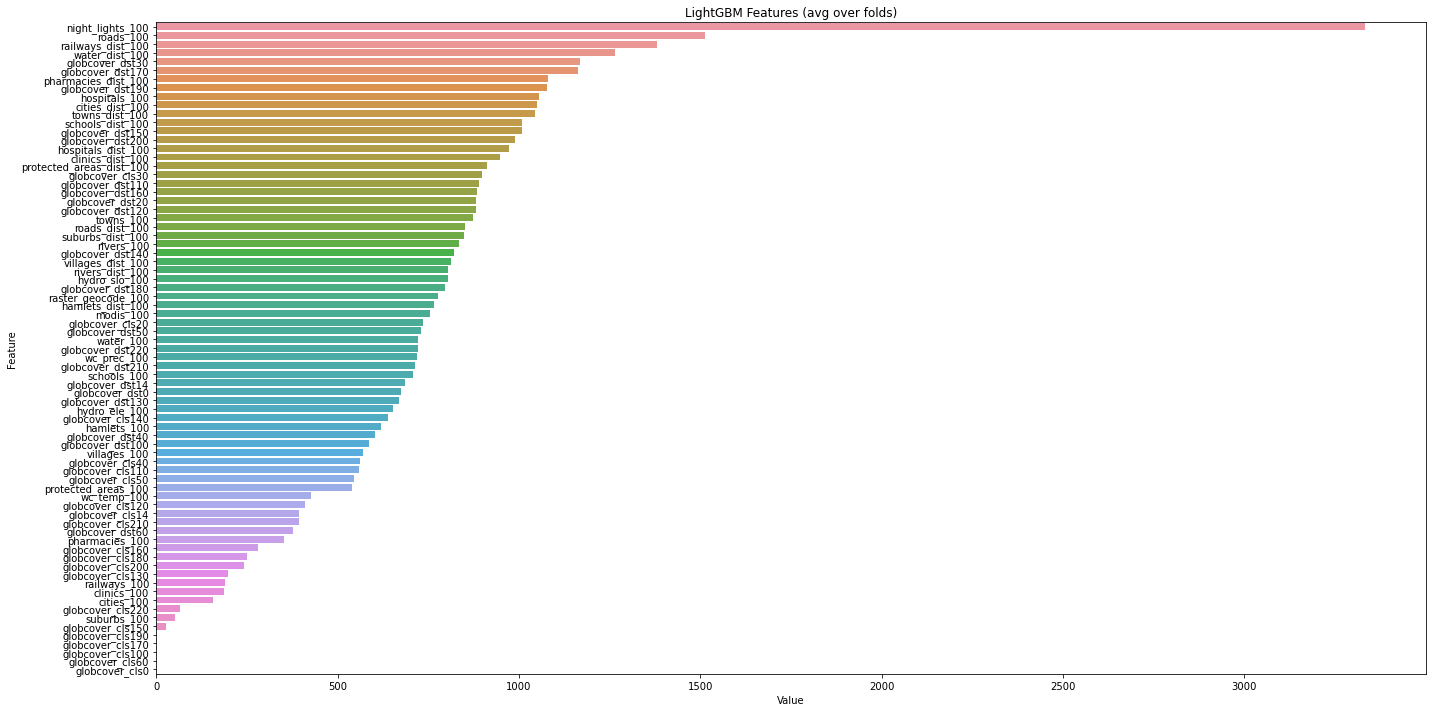

<Figure size 432x288 with 0 Axes>

In [615]:
# LightGBM Feature Importance 
feature_imp =\
pd.DataFrame(sorted(zip(lgb_colombia.feature_importances_, df_quindio.columns)), 
             columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

# Exercise 3

Use your trained model and the grid-level data for Qunidío (“quindio_input_grid.fst”) to make a prediction of the grid-level population density of Quindío. Make sure that the sums of your grid-level population predictions match the official numbers on the municipality level.

Since the same features used to train the two models for population predictions for the Colombia dataset are available for grid-level divisions of the ADM2-level units of Quindio, those same models can be used to predict the grid-level population.

## XGB

In [616]:
y_xgb_colombia_pred_quindio =\
    xgb_colombia.predict(X_quindio)

## LightGBM

In [618]:
# test_pred
y_lgb_colombia_pred_quindio =\
    lgb_colombia.predict(
        X_quindio, num_iteration=lgb_colombia.best_iteration_)

## Post Processing (Create quindio_output)

We make sure that all of the grid-level population estimates add up to the ADM2-level populations. To do this we calculate a normalizing factor to scale all of the grid-level population estimates which are associated with each of the 12 ADM2 regions.

In [619]:
df_quindio_output = df_quindio_input.copy()

In [620]:
df_quindio_output['y_xgb_colombia_pred_quindio'] =\
    y_xgb_colombia_pred_quindio
df_quindio_output['y_lgb_colombia_pred_quindio'] =\
    y_lgb_colombia_pred_quindio

In [622]:
for i in df_quindio_output.raster_geocode_100.unique():
    CON =(df_quindio_output['raster_geocode_100'] == i)
    ADM2 = df_quindio_output[CON]
    
    
    y_xgb_GridPopPredSum = sum(ADM2['y_xgb_colombia_pred_quindio'].values)
    y_lgb_GridPopPredSum = sum(ADM2['y_lgb_colombia_pred_quindio'].values)
    
    # Create Normalization for grid-level populations to ensure 
    # the sum of each element equals ADM2-level aggregated populations
    y_xgb_NormFactGridPopPred =  ADM2['raster_pop_100'].values[0]/y_xgb_GridPopPredSum
    y_lgb_NormFactGridPopPred =  ADM2['raster_pop_100'].values[0]/y_lgb_GridPopPredSum
    
    y_xgb_NormGridPopPred =  y_xgb_NormFactGridPopPred * ADM2['y_xgb_colombia_pred_quindio'].values
    y_lgb_NormGridPopPred =  y_lgb_NormFactGridPopPred * ADM2['y_lgb_colombia_pred_quindio'].values
    
   
    df_quindio_output.loc[CON,'y_xgb_NormFact_quindio'] = y_xgb_NormFactGridPopPred
    df_quindio_output.loc[CON,'y_lgb_NormFact_quindio'] = y_lgb_NormFactGridPopPred
    
    df_quindio_output.loc[CON,'y_xgb_colombia_pred_quindio_norm'] = y_xgb_NormGridPopPred
    df_quindio_output.loc[CON,'y_lgb_colombia_pred_quindio_norm'] = y_lgb_NormGridPopPred
    

In [456]:
df_quoidion_output[['raster_geocode_100', 
                    'raster_pop_100', 
                    'y_xgb_colombia_pred_quindio', 'y_xgb_colombia_pred_quindio_norm',
                    'y_lgb_colombia_pred_quindio', 'y_lgb_colombia_pred_quindio_norm']].sample(10)

,raster_geocode_100,raster_pop_100,y_xgb_colombia_pred_quindio,y_xgb_colombia_pred_quindio_norm,y_lgb_colombia_pred_quindio,y_lgb_colombia_pred_quindio_norm
24428,63594,2.306563,0.134299,2.226846e-05,0.277271,0.000064
111256,63302,0.255213,0.039882,3.096933e-06,0.044944,0.000003
156927,63690,0.266975,0.142255,4.189027e-06,0.337757,0.000010
131230,63548,0.210254,0.025522,2.340520e-06,0.046873,0.000003
69488,63594,2.306563,0.094524,1.567325e-05,0.101382,0.000023
179926,63690,0.266975,0.033792,9.950812e-07,0.063371,0.000002
135769,63272,1.133927,0.056608,1.029489e-05,0.085435,0.000018
135975,63130,3.300503,0.048711,2.791473e-06,0.079550,0.000009
116493,63302,0.255213,0.042234,3.279597e-06,0.047044,0.000003
136301,63548,0.210254,0.029893,2.741288e-06,0.048307,0.000004


# Exercise 4

Create a plot showing maps of the population density in Qundío (i) based on the input data and (ii) based in your predictions side by side.

## Create df_colombia_output

In [484]:
y_xgb_colombia_pred = xgb_colombia.predict(X_colombia)
y_lgb_colombia_pred = lgb_colombia.predict(X_colombia) 

In [490]:
df_colombia_output = df_colombia_input.copy()
df_colombia_output['y_xgb_colombia_pred'] = y_xgb_colombia_pred
df_colombia_output['y_lgb_colombia_pred'] = y_lgb_colombia_pred

In [491]:
df_colombia_output.columns

Index(['raster_geocode_100', 'raster_pop_100', 'cities_100', 'cities_dist_100',
       'clinics_100', 'clinics_dist_100', 'globcover_cls0', 'globcover_cls100',
       'globcover_cls110', 'globcover_cls120', 'globcover_cls130',
       'globcover_cls14', 'globcover_cls140', 'globcover_cls150',
       'globcover_cls160', 'globcover_cls170', 'globcover_cls180',
       'globcover_cls190', 'globcover_cls20', 'globcover_cls200',
       'globcover_cls210', 'globcover_cls220', 'globcover_cls30',
       'globcover_cls40', 'globcover_cls50', 'globcover_cls60',
       'globcover_dst0', 'globcover_dst100', 'globcover_dst110',
       'globcover_dst120', 'globcover_dst130', 'globcover_dst14',
       'globcover_dst140', 'globcover_dst150', 'globcover_dst160',
       'globcover_dst170', 'globcover_dst180', 'globcover_dst190',
       'globcover_dst20', 'globcover_dst200', 'globcover_dst210',
       'globcover_dst220', 'globcover_dst30', 'globcover_dst40',
       'globcover_dst50', 'globcover_dst60', 'ha

In [496]:
df_colombia_output['ADM2_PCODE'] =\
    df_colombia_output.apply(lambda row: 'CO' + str(int(row['raster_geocode_100'])), axis=1)

In [497]:
df_colombia_output[['raster_geocode_100', 'raster_pop_100', 'ADM2_PCODE', 
                   'y_xgb_colombia_pred', 'y_lgb_colombia_pred']].sample(10)

,raster_geocode_100,raster_pop_100,ADM2_PCODE,y_xgb_colombia_pred,y_lgb_colombia_pred
507,25394,0.496559,CO25394,0.497649,0.496234
288,15740,0.564438,CO15740,0.566423,0.571210
477,25200,1.661470,CO25200,1.655015,1.638653
76,5541,1.781180,CO5541,1.787772,1.669662
704,50450,0.067486,CO50450,0.067479,0.062286
185,13683,1.357013,CO13683,1.359234,1.240185
457,23855,0.388964,CO23855,0.392213,0.408684
1086,88001,20.468380,CO88001,20.479906,25.193049
238,15362,0.568459,CO15362,0.571918,0.567249
904,68533,0.637722,CO68533,0.643142,0.613149


## Get Exogenous Map Data

In [569]:
# Load shape file of quindio
gdf_quindio = gpd.read_file('quindio.shp')

In [515]:
# Check crs of the geodataframe (Geopandas DataFrame (gdf))
gdf_quindio.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [571]:
# Create columns for area and centroid geometery summary data
# The centroids will be used for plotting later
gdf_quindio['area'] = gdf_quindio.area
gdf_quindio['centroids'] = gdf_quindio.centroid

<ipython-input-571-37fbbfb83f4f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_quindio['area'] = gdf_quindio.area
<ipython-input-571-37fbbfb83f4f>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_quindio['centroids'] = gdf_quindio.centroid


In [513]:
# Check gdf
gdf_quindio.head(2)

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,0.906602,0.009902,Armenia,CO63001,None,None,None,Quindio,CO63,Colombia,CO,2018-01-01,2020-04-16,None,"POLYGON ((-75.64056 4.58464, -75.64055 4.58463..."
1,0.253410,0.003131,Buenavista,CO63111,None,None,None,Quindio,CO63,Colombia,CO,2018-01-01,2020-04-16,None,"POLYGON ((-75.72842 4.40549, -75.72820 4.40548..."


## Merge Quindio map with Colombia Output Data

In [502]:
# Merge Quindio map data with Colombia features, target and predictions data
gdf_quindio_data = pd.merge(gdf_quindio, df_colombia_output, how='left',
                           left_on='ADM2_PCODE', right_on='ADM2_PCODE')

In [503]:
# Check after merge gdf length
len(gdf_quindio_data)

12

In [539]:
# Check gdf 
gdf_quindio_data.head(2)

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry,area,centroids,raster_geocode_100,raster_pop_100,cities_100,cities_dist_100,clinics_100,clinics_dist_100,globcover_cls0,globcover_cls100,globcover_cls110,globcover_cls120,globcover_cls130,globcover_cls14,globcover_cls140,globcover_cls150,globcover_cls160,globcover_cls170,globcover_cls180,globcover_cls190,globcover_cls20,globcover_cls200,globcover_cls210,globcover_cls220,globcover_cls30,globcover_cls40,globcover_cls50,globcover_cls60,globcover_dst0,globcover_dst100,globcover_dst110,globcover_dst120,globcover_dst130,globcover_dst14,globcover_dst140,globcover_dst150,globcover_dst160,globcover_dst170,globcover_dst180,globcover_dst190,globcover_dst20,globcover_dst200,globcover_dst210,globcover_dst220,globcover_dst30,globcover_dst40,globcover_dst50,globcover_dst60,hamlets_100,hamlets_dist_100,hospitals_100,hospitals_dist_100,hydro_ele_100,hydro_slo_100,modis_100,night_lights_100,pharmacies_100,pharmacies_dist_100,protected_areas_100,protected_areas_dist_100,railways_100,railways_dist_100,rivers_100,rivers_dist_100,roads_100,roads_dist_100,schools_100,schools_dist_100,suburbs_100,suburbs_dist_100,towns_100,towns_dist_100,villages_100,villages_dist_100,water_100,water_dist_100,wc_prec_100,wc_temp_100,y_xgb_colombia_pred,y_lgb_colombia_pred
0,0.906602,0.009902,Armenia,CO63001,None,None,None,Quindio,CO63,Colombia,CO,2018-01-01,2020-04-16,None,"POLYGON ((-75.64056 4.58464, -75.64055 4.58463...",0.009902,POINT (-75.72490 4.49950),63001,24.309137,0.000082,8227.046650,0.001236,6447.117531,0,0,0.0,0.0,0.123630,0.186763,0.065194,0.0,0.0,0.0,0.006346,0.077722,0.184044,0.000495,0.0,0.0,0.029177,0.326630,0.0,0,967682.617654,1.011447e+06,13522.757603,13555.896810,1110.730487,1250.869282,2079.347729,42127.142586,35183.359763,293447.881315,6524.131048,5722.318965,519.513558,5545.542323,45694.558394,11234.861040,2030.919229,785.177038,14208.116047,1.004674e+06,0.000082,5977.652188,0.003709,2587.322344,1289.709965,3.404173,9106.422979,8.159146,0.00478,4554.744334,0.0,9194.004121,0.0,8267.737575,0.034534,1124.804912,0.262425,245.042117,0.007006,2193.797577,0.0,33480.448364,0.000000,5109.632737,0.0,9811.587241,0.002225,2238.323992,1993.983067,21.238670,24.341694,29.232022
1,0.253410,0.003131,Buenavista,CO63111,None,None,None,Quindio,CO63,Colombia,CO,2018-01-01,2020-04-16,None,"POLYGON ((-75.72842 4.40549, -75.72820 4.40548...",0.003131,POINT (-75.74404 4.36663),63111,0.805963,0.000000,20464.356621,0.000000,18427.895725,0,0,0.0,0.0,0.163452,0.139990,0.071168,0.0,0.0,0.0,0.000000,0.000000,0.297706,0.000000,0.0,0.0,0.013556,0.314129,0.0,0,982372.158498,9.976444e+05,5070.942388,6819.319343,700.750521,1307.208029,1124.742961,36238.523983,22622.320647,282424.297445,4012.272158,18324.758603,378.120959,4233.906674,55396.068040,14608.926486,3035.910584,405.575600,8578.657195,9.903519e+05,0.000261,4631.018509,0.000261,2495.533889,1348.639990,13.992035,8535.138686,0.150574,0.00000,17368.331335,0.0,16187.473149,0.0,10967.373827,0.007039,1778.063087,0.071429,726.747914,0.001564,1695.679353,0.0,35295.308655,0.000261,2488.197080,0.0,6647.621481,0.000000,3047.804223,1884.679069,21.014293,0.805857,0.825464


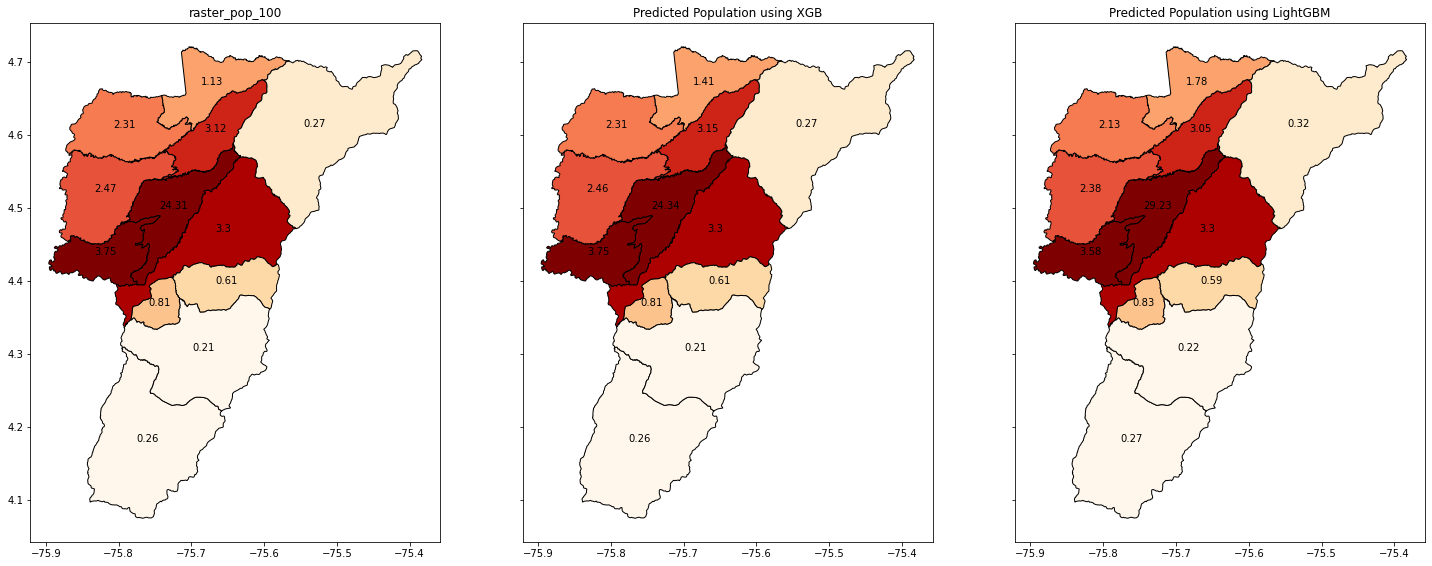

In [578]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(25, 35))
gdf_quindio_data.plot(ax=ax1, column="raster_pop_100", 
                 scheme='QUANTILES', k=10,
                 cmap='OrRd', legend=False, figsize=(5,15), edgecolor='k')
for idx, row in gdf_quindio_data.iterrows():
    ax1.annotate(text=round(row['raster_pop_100'],2), xy=(row['centroids'].x,row['centroids'].y),
                 horizontalalignment='center', color = 'k')
ax1.title.set_text('raster_pop_100')

gdf_quindio_data.plot(ax=ax2, column="y_xgb_colombia_pred", 
                 scheme='QUANTILES', k=10,
                 cmap='OrRd', legend=False, figsize=(5,15), edgecolor='k')
for idx, row in gdf_quindio_data.iterrows():
    ax2.annotate(text=round(row['y_xgb_colombia_pred'], 2), xy=(row['centroids'].x,row['centroids'].y),
                 horizontalalignment='center', color = 'k')
ax2.title.set_text('Predicted Population using XGB')
    
gdf_quindio_data.plot(ax=ax3, column="y_lgb_colombia_pred", 
                 scheme='QUANTILES', k=10,
                 cmap='OrRd', legend=False, figsize=(5,15), edgecolor='k')
for idx, row in gdf_quindio_data.iterrows():
    ax3.annotate(text=round(row['y_lgb_colombia_pred'],2), xy=(row['centroids'].x,row['centroids'].y),
                 horizontalalignment='center', color = 'k')
ax3.title.set_text('Predicted Population using LightGBM')

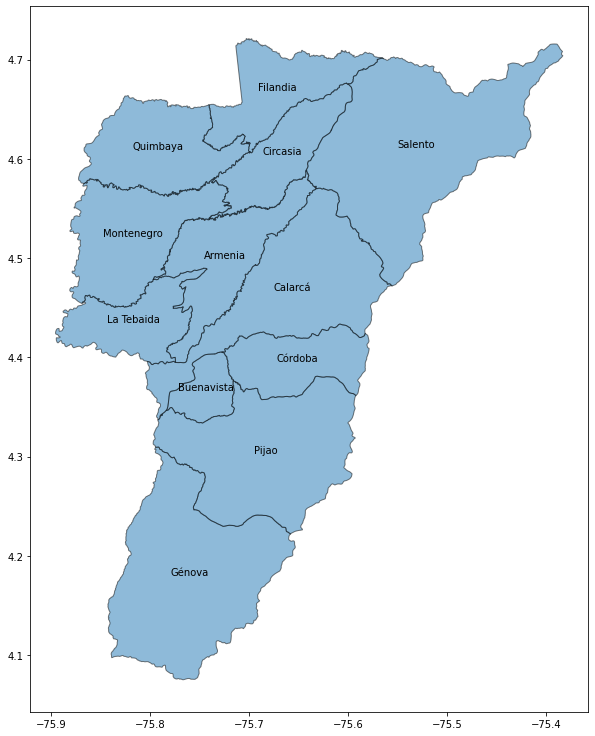

In [566]:
# Names of ADM2 units in Quindio 
gdf_quindio.plot(figsize=(10,15), alpha=0.5, edgecolor='k')
for idx, row in gdf_quindio.iterrows():
    plt.annotate(text=row['ADM2_ES'], xy=(row['centroids'].x,row['centroids'].y),
                 horizontalalignment='center', color = 'k')

# Resources

- 272778914_Relationships_between_Nighttime_Imagery_and_Population_Density_for_Hong_Kong
- https://www.kaggle.com/code/lasmith/house-price-regression-with-lightgbm
- https://www.kaggle.com/code/ashishpatel26/feature-importance-of-lightgbm/notebook
- https://medium.com/@haniszulaikha/starter-tutorial-on-geopandas-d3ede5cc16e9
- https://en.wikipedia.org/wiki/Gamma_distribution